In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from tensorflow import keras
from keras.layers import Dense, Flatten, AlphaDropout
import keras.callbacks as callbacks;
import os
import random

In [40]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
 import time
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [41]:
test = pd.read_csv("Datasets/emnist-balanced-test.csv").to_numpy()
train = pd.read_csv("Datasets/emnist-balanced-train.csv").to_numpy()

In [42]:
x_train, x_valid = train[5000:, 1:], train[:5000, 1:]
x_train, x_valid = x_train / 255.0, x_valid/ 255.0
y_train, y_valid = train[5000:, 0], train[:5000, 0]

x_train.shape, y_train.shape

((107799, 784), (107799,))

In [43]:
y_train_unique = numpy.unique(y_train)
y_train_unique.size

47

In [44]:
model = keras.models.Sequential([
    Flatten(input_shape=[784]),
    Dense(300, activation="relu"),
    Dense(300, activation="relu"),
    Dense(300, activation="relu"),
    AlphaDropout(rate=0.2),
    Dense(y_train_unique.size, activation="softmax")
])

In [45]:
model.summary(), model.input_shape

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dense_3 (Dense)             (None, 300)               90300     
                                                                 
 dense_4 (Dense)             (None, 300)               90300     
                                                                 
 alpha_dropout_1 (AlphaDropo  (None, 300)              0         
 ut)                                                             
                                                                 
 dense_5 (Dense)             (None, 47)                14147     
                                                      

(None, (None, 784))

In [46]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
              optimizer=keras.optimizers.SGD(momentum=0.9), 
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [47]:
tensorboard_cb = callbacks.TensorBoard(run_logdir)
early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
lr_scheduler_cb = callbacks.ReduceLROnPlateau(factor=0.5, patience=4)
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), callbacks=[early_stopping_cb, lr_scheduler_cb, tensorboard_cb])

Epoch 1/100
3369/3369 [==============================] - 7s 2ms/step - loss: 1.3782 - sparse_categorical_accuracy: 0.5958 - val_loss: 0.7817 - val_sparse_categorical_accuracy: 0.7696 - lr: 0.0100
Epoch 2/100
3369/3369 [==============================] - 6s 2ms/step - loss: 0.8112 - sparse_categorical_accuracy: 0.7436 - val_loss: 0.6445 - val_sparse_categorical_accuracy: 0.8144 - lr: 0.0100
Epoch 3/100
3369/3369 [==============================] - 6s 2ms/step - loss: 0.6829 - sparse_categorical_accuracy: 0.7803 - val_loss: 0.6067 - val_sparse_categorical_accuracy: 0.8196 - lr: 0.0100
Epoch 4/100
3369/3369 [==============================] - 6s 2ms/step - loss: 0.6182 - sparse_categorical_accuracy: 0.7977 - val_loss: 0.6047 - val_sparse_categorical_accuracy: 0.8270 - lr: 0.0100
Epoch 5/100
3369/3369 [==============================] - 6s 2ms/step - loss: 0.5696 - sparse_categorical_accuracy: 0.8122 - val_loss: 0.5620 - val_sparse_categorical_accuracy: 0.8320 - lr: 0.0100
Epoch 6/100
3369/336

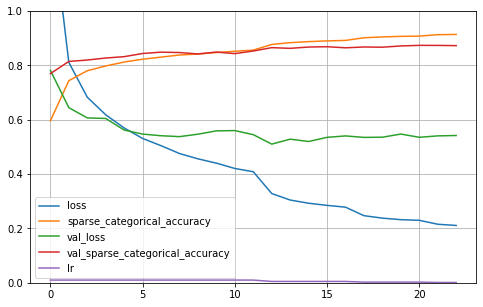

In [48]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [50]:
label_map = pd.read_csv("Datasets/emnist-balanced-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)

label_dictionary = {}
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

In [51]:
def show_image(image):
    image = image.reshape(28,28)
    image = numpy.fliplr(image)
    image = numpy.rot90(image)

    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.show()

def get_random_image():
    x_test = random.choice(test[:,1:])
    x_test = x_test / 255.0
    x_test = numpy.expand_dims(x_test, axis=0)
    return x_test

def predict_image(image):
    y_proba = model.predict(image)
    print(y_proba.round(2))
    return numpy.argmax(y_proba, axis=1)


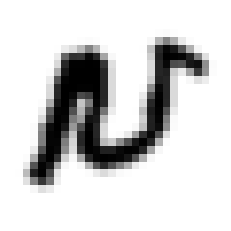

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Prediction:
Label index: 23
Character predicted: N


In [62]:
image = get_random_image()
show_image(image)
image_class = predict_image(image)

print("Prediction:")
print("Label index:", image_class[0])
print("Character predicted:", label_dictionary[image_class[0]])

In [54]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 30988), started 12:31:51 ago. (Use '!kill 30988' to kill it.)